In [66]:
import numpy as np
import pandas as pd
import pickle
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [67]:
datas = ['icln', 'qcln' , 'pbd' , 'misc' ]

In [70]:
def plot_columns_based_on_date(df, columns, date_column='date'):
    """
    Plots the specified columns in a DataFrame based on a date column.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data to be plotted.
    - date_column (str): The name of the date column in the DataFrame.
    - columns (list): A list of column names to be plotted.
    
    Returns:
    - None
    """
    
    # Ensure the date column is in datetime format
    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Set the date column as the index
    df.set_index(date_column, inplace=True)
    
    # Plot each column
    plt.figure(figsize=(10, 6))
    for column in columns:
        plt.plot(df.index, df[column], label=column)
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Time Series Plot of Specified Columns')
    plt.legend()
    plt.grid(True)
    plt.show()

def normalize_column(df, column_name):
    
    col_min = df[column_name].min()
    col_max = df[column_name].max()
    
    # Check if the column has constant values to avoid division by zero
    if col_max - col_min == 0:
        return df[column_name]  # If all values are the same, return the column as is
    
    # Apply min-max normalization
    normalized_column = (df[column_name] - col_min) / (col_max - col_min)
    
    return normalized_column


def standardize_columns(df, columns, window=200):
    """
    Standardizes the specified columns in a DataFrame based on a gradually increasing window up to the specified window size.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data to be standardized.
    - columns (list): A list of column names to be standardized.
    - window (int): The maximum window size to use for computing the rolling mean and std. Default is 200.
    
    Returns:
    - pd.DataFrame: A DataFrame with the original columns and the standardized columns.
    """
    
    result_df = df.copy()


    

    for column in columns:
    #     # result_df[column] = normalize_column(result_df, column)
        result_df[column] = result_df[column] - result_df[column].shift(1)
        
    # return result_df[1:]

        # After reaching the desired window size, switch to a rolling window
    #     rolling_mean = result_df[column].rolling(window=window).mean()
    #     rolling_std = result_df[column].rolling(window=window).std().fillna(0.01).replace(0, 0.01)
        
    #     standardized_column_name = f'{column}'
        
    # #     # Combine both methods: use expanding until the window size, then switch to rolling
    #     # result_df[standardized_column_name] = (result_df[column] - expanding_mean) / expanding_std
    #     result_df[standardized_column_name] = (result_df[column] - rolling_mean) / rolling_std

    return result_df[1:]




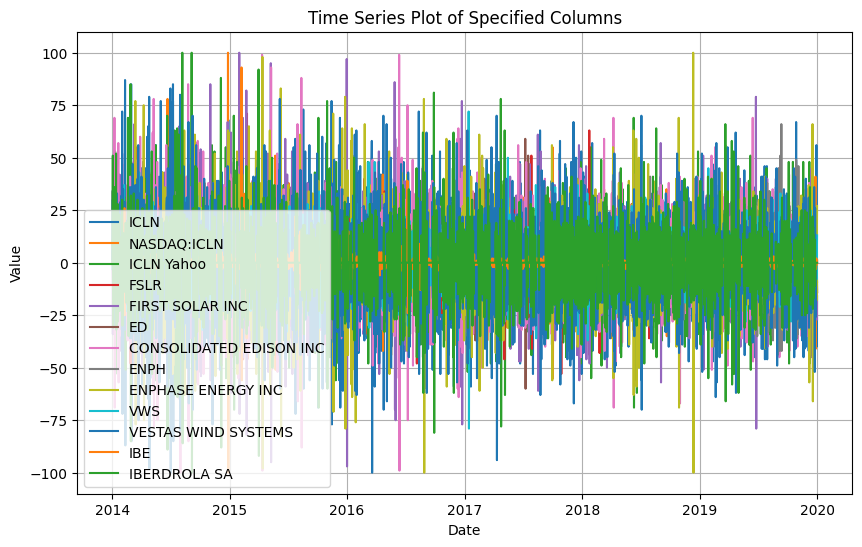

date                       0
ICLN                       0
NASDAQ:ICLN                0
ICLN Yahoo                 0
FSLR                       0
FIRST SOLAR INC            0
ED                         0
CONSOLIDATED EDISON INC    0
ENPH                       0
ENPHASE ENERGY INC         0
VWS                        0
VESTAS WIND SYSTEMS        0
IBE                        0
IBERDROLA SA               0
dtype: int64


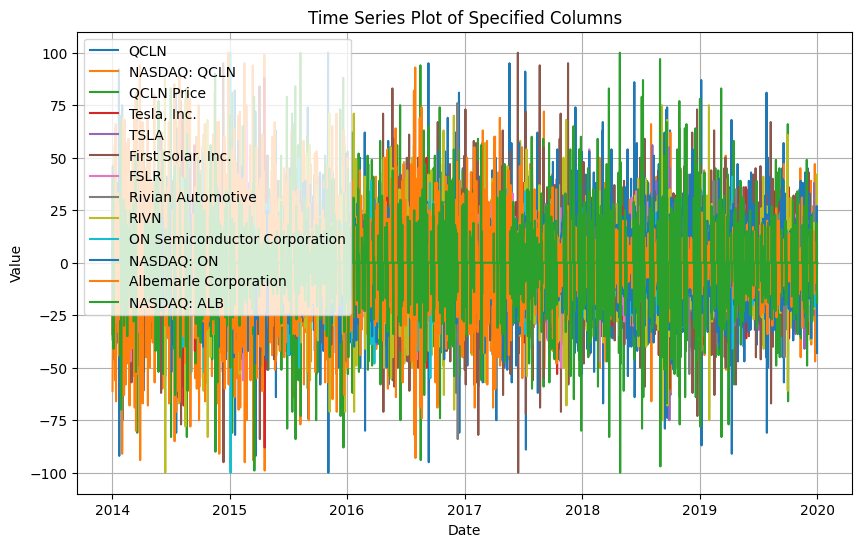

date                            0
QCLN                            0
NASDAQ: QCLN                    0
QCLN Price                      0
Tesla, Inc.                     0
TSLA                            0
First Solar, Inc.               0
FSLR                            0
Rivian Automotive               0
RIVN                            0
ON Semiconductor Corporation    0
NASDAQ: ON                      0
Albemarle Corporation           0
NASDAQ: ALB                     0
dtype: int64


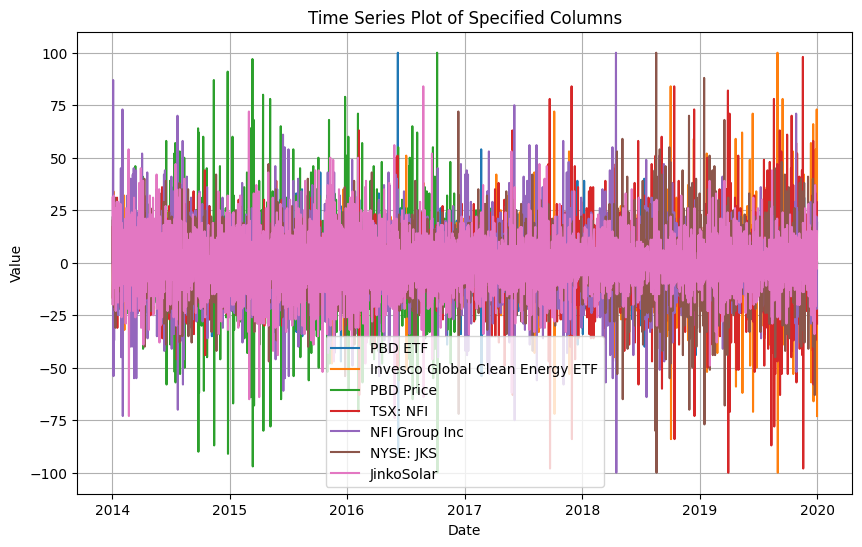

date                               0
PBD ETF                            0
Invesco Global Clean Energy ETF    0
PBD Price                          0
TSX: NFI                           0
NFI Group Inc                      0
NYSE: JKS                          0
JinkoSolar                         0
dtype: int64


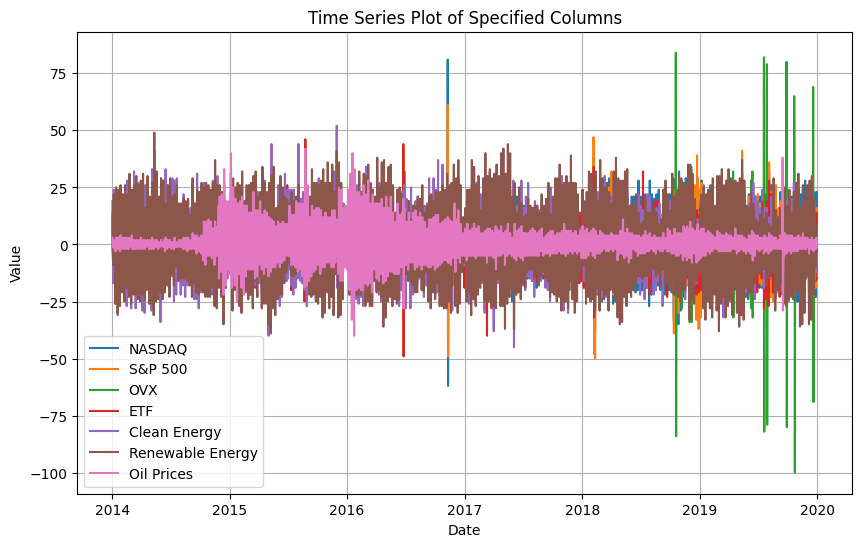

date                0
NASDAQ              0
S&P 500             0
OVX                 0
ETF                 0
Clean Energy        0
Renewable Energy    0
Oil Prices          0
dtype: int64


In [71]:
new_datas = []
for i in datas : 
    df = pd.read_csv(f"csv/{i}_google_trends.csv")
    to_mod = list(df.columns)
    to_mod.remove("date")
    new_df = standardize_columns(df,to_mod)
    plot_columns_based_on_date(new_df,to_mod)
    nan_count_per_column = new_df.isna().sum()
    print(nan_count_per_column)
    new_df.to_csv(f"trends/{i}_formatted.csv",index=False)
    new_datas.append(new_df)

In [22]:
new_datas

[            date      ICLN  NASDAQ:ICLN  ICLN Yahoo      FSLR  \
 0     2014-01-01  0.000000     0.000000    0.000000  0.000000   
 1     2014-01-02  0.000000     0.707107    0.000000  0.707107   
 2     2014-01-03  0.000000     0.943456    1.154701  0.377964   
 3     2014-01-04  0.000000     1.002656   -0.500000 -1.423446   
 4     2014-01-05  0.000000    -0.991285   -0.447214 -0.811319   
 ...          ...       ...          ...         ...       ...   
 2187  2019-12-28 -0.629976    -0.496486   -0.548399 -1.593296   
 2188  2019-12-29 -0.716737    -0.496469   -0.548388 -1.575563   
 2189  2019-12-30 -0.402543    -0.496452   -0.548377 -1.522237   
 2190  2019-12-31 -0.632539    -0.496434   -0.448955 -1.432992   
 2191  2020-01-01 -0.722052    -0.489986   -0.554364 -1.679234   
 
       FIRST SOLAR INC        ED  CONSOLIDATED EDISON INC      ENPH  \
 0            0.000000  0.000000                 0.000000  0.000000   
 1            0.707107  0.000000                 0.000000  0.000